Workflow:
https://cocreate.csail.mit.edu/r/vEwbyFS8B3BhK3k3F

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hourbikedataset/hour.csv
/kaggle/input/daybikedataset/day.csv


In [2]:
# file = open("/kaggle/input/daybikedataset/day.csv", "rb")
# file = open("/kaggle/input/d/vedika27agarwal/daybikedataset/day.csv", "rb")
file = open("/kaggle/input/hourbikedataset/hour.csv", "rb")

data_r = file.readlines()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# data_arr = np.genfromtxt('/kaggle/input/daybikedataset/day.csv', delimiter=',', dtype=np.float64, skip_header=1)
# data_arr = np.genfromtxt('/kaggle/input/d/vedika27agarwal/daybikedataset/day.csv', delimiter=',', dtype=np.float64, skip_header=1)

data_arr = np.genfromtxt('/kaggle/input/hourbikedataset/hour.csv', delimiter=',', dtype=np.float64, skip_header=1)

data_arr = np.hstack((data_arr[:, 11:13]*100, data_arr[:, 16:17]))

In [4]:
print(data_arr.shape)

(17379, 3)


In [5]:
print(data_arr)

[[28.79 81.   16.  ]
 [27.27 80.   40.  ]
 [27.27 80.   32.  ]
 ...
 [25.76 60.   90.  ]
 [27.27 56.   61.  ]
 [27.27 65.   49.  ]]


In [6]:
data_arr = data_arr.astype(int)
print(data_arr)

[[28 81 16]
 [27 80 40]
 [27 80 32]
 ...
 [25 60 90]
 [27 56 61]
 [27 65 49]]


In [7]:
from mpl_toolkits.mplot3d import Axes3D
import random
import math

random_seed = 6
data_freq = 15000
# data = data_arr[:data_freq, :]
random.seed(random_seed)
indices = random.sample(range(data_arr.shape[0]), data_freq)

data = data_arr[indices, :]

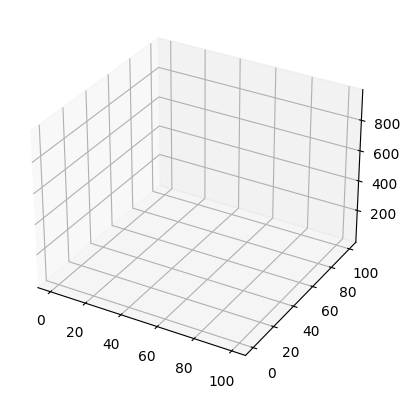

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(data[:, 0:1], data[:, 1:2], data[:, 2:], cmap='viridis')
plt.show()

In [9]:
class Vector:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c
        
    def dot_product(self, vector):
        return (self.a*vector.a + self.b*vector.b + self.c*vector.c)
    
    def cross_product(self, vector):
        a = self.b*vector.c - self.c*vector.b
        b = self.c*vector.a - self.a*vector.a
        c = self.a*vector.b - self.b*vector.a
        return Vector(a, b, c)
    
    def magnitude(self):
        return np.sqrt(self.a**2 + self.b**2 + self.c**2)
    
    def unit_vector(self):
        magnitude = self.magnitude()
        return Vector(round(self.a / magnitude, 4), round(self.b / magnitude, 4), round(self.c / magnitude, 4))
    
    def __eq__(self, other):
        return (isinstance(other, Vector) and
               math.fabs(self.a - other.a) < 0.0001 and
               math.fabs(self.b - other.b) < 0.0001 and
               math.fabs(self.c - other.c) < 0.0001)
    
    def __hash__(self):
        return hash((self.a, self.b, self.c))

In [10]:
class Point:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    
    def __eq__(self, other):
        return (isinstance(other, Point) and
               math.fabs(self.x - other.x) < 0.0001 and
               math.fabs(self.y - other.y) < 0.0001 and
               math.fabs(self.z - other.z) < 0.0001)
    
    def __hash__(self):
        return hash((self.x, self.y, self.z))

In [11]:
class Line:
    def __init__(self, pt1, pt2):
        self.dir_cosine = Vector(pt1.x - pt2.x, pt1.y - pt2.y, pt1.z - pt2.z).unit_vector()
        
        if self.dir_cosine.a:
            lamda = - round(pt1 / self.dir_cosine.a, 4)
            x = 0
            y = lamda * self.dir_cosine.b + pt1.y
            z = lamda * self.dir_cosine.c + pt1.z
            self.pt = Point(x, y, z)
        
        else:
            if self.dir_cosine.b:
                lamda = - round(pt1 / self.dir_cosine.b, 4)
                y = 0
                z = lamda * self.dir_cosine.c + pt1.z
                self.pt = Point(pt1.x, y, z)
            
            else:
                if self.dir_cosine.c:
                    self.pt = Point(pt1.x, pt2.y, 0)
                
                else:
                    self.pt = pt1
                    self.dir_cosine = Vector(1, 0, 0)
    
    def distance_from_pt(self, point):
        line_vector = Vector(point.x - self.pt.x, point.y - self.pt.y, point.z - self.pt.z)
        numerator = line_vector.cross_product(self.dir_cosine).magnitude()
        denominator = self.dir_cosine.magnitude()
        return round(numerator / denominator, 4)
    
    def __eq__(self, other):
        return (isinstance(other, Line) and
               self.dir_cosine == other.dir_cosine and
               self.pt == other.pt)
    
    def __hash__(self):
        return hash((self.dir_cosine, self.pt))

In [12]:
def find_min_dist(pt, F):
    F = list(F)
    min_dist = F[0].distance_from_pt(pt)
    for line in F[1:]:
        cur_dist = line.distance_from_pt(pt)
        min_dist = min(min_dist, cur_dist)
    
    return min_dist

In [13]:
import heapq

def Approx_k_j_Flats(P, C, k=1, j=1):
    
    t = 1
    Q = P
    F = set()
    F_len_mid = None
    
    while Q.shape[0] >= C*k*(j+1):
        S_len = 1
        
        indx_S0 = random.sample(range(Q.shape[0]), S_len)
        indx_S1 = random.sample(range(Q.shape[0]), S_len)
        
        F_ = set()
        for i in range(S_len):
            for j in range(S_len):
                F_.add(Line(Q[indx_S0[i]], Q[indx_S1[j]]))
        
        F.update(F_)
        
        min_dist_rec = [] # Contains lists [dist, indx] as elements where dist = min distance of point Q[indx] from closest line
        Q_index = 0
        for pt in Q:
            min_dist_rec.append((-1*find_min_dist(pt, F_), Q_index))
            Q_index += 1
        
        heapq.heapify(min_dist_rec)
        
        Q_ = []
        for i in range(Q.shape[0]//2):
            Q_.append(Q[heapq.heappop(min_dist_rec)[1]])
        
        Q = np.array(Q_)
        t += 1
    
    F_len_mid = len(F)
    
    for pt1 in Q:
        for pt2 in Q:
            F.add(Line(pt1, pt2))
    
    return Q, F.copy(), F_len_mid

In [ ]:
# def plotPoint(P, clr, marker='o'):
#     plt.plot(P[:, 0], P[:, 1], marker=marker, linestyle=' ', color=clr)
    
# def plotLine(m, c, clr):
#     if m==None:
#         x1, y1, x2, y2 = c, 0, c, 100
#     elif m==0:
#         x1, y1, x2, y2 = 0, c, 100, c
#     else:
#         x1, y1, x2, y2 = 0, c, -c/m, 0
#     if x2!=x1:
#         x = np.linspace(min(x1, x2) - 100, max(x1, x2) + 100, 100)        
#         y = m * (x - x1) + y1
#         plt.plot(x, y, linestyle='-', color=clr)
#     else:
#         plt.plot([x1, y1], [x2, y2], linestyle='-', color=clr)

In [ ]:
# def find_k_j_flats(data, C): 

#     '''
#     Calls Approx-K-J-Flats and returns the output F in the form of a list
#     '''
    
#     Q_2, F_2, F_len_mid = Approx_k_j_Flats(data, C)
#     F_2 = list(F_2)

# #     plotPoint(Q_2, 'red')
# #     for line in F_2:
# #         plotLine(line[0], line[1])

# #     data_view = data.view([('', data.dtype)] * data.shape[1])
# #     Q_2_view = Q_2.view([('', Q_2.dtype)] * Q_2.shape[1])

# #     Q_3 = np.setdiff1d(data_view, Q_2_view).view(data.dtype).reshape(-1, data.shape[1])

# #     plotPoint(Q_3, 'blue')

# #     plt.xlim(-25, 100)
# #     plt.ylim(-25, 125)
# #     plt.show()
    
#     return F_2, F_len_mid

In [ ]:
# def find_optimal_l_centrum(F, l, P):
    
#     '''
#     For each point in P, distance is calculated from:
#         -the optimal line in F
#         -its closest line in F
#     '''
    
#     flag = True
#     optimalLine = None #One line in F that for  which sum of max_l_distances is minimum
#     optimalDistances = [] #Distance of each point from this selected optimalLine
#     closestDistances = [] #Distance of each point from its closest line in F
#     first_line_flag = True
    
#     for line in F:
#         distances = []
#         for pt in range(len(P)):
#             d = find_dist(P[pt], line)
#             distances.append(d)
            
#             if first_line_flag:
#                 closestDistances.append(d)
#             else:
#                 closestDistances[pt] = min(closestDistances[pt], d)
        
#         first_line_flag = False
#         distances.sort(reverse=True)
        
#         max_l_sum = sum(distances[:l])
        
#         if flag:
#             optimalDistance = max_l_sum
#             flag = False
            
#         optimalDistance = min(optimalDistance, max_l_sum)
        
#         if optimalDistance == max_l_sum:
#             optimalLine = line
#             optimalDistances = distances
            
#     closestDistances.sort(reverse=True)
#     return optimalLine, optimalDistances, closestDistances

In [ ]:
# def find_optimal_dist_sum(data, l, F):
#     '''
#         Calls find_optimal_l_centrum
#         Computes and returns values of objective function when:
#             -centre = 1 optimal line
#             -centre = F (set of lines)
#         Also returns the optimal line
#     '''
#     L_1, D_1, D_n = find_optimal_l_centrum(F, l, data)
#     optimal_max_l_dist_sum  = sum(D_1[:l]) #Sum of max_l_distances for 1 line
#     optimal_closest_l_dist_sum = sum(D_n[:l]) #Sum of max_l_distances for F set

# #     plotPoint(data, 'red')
# #     plotLine(L_1[0], L_1[1])

# #     plt.xlim(-25, 100)
# #     plt.ylim(-25, 125)
# #     plt.show()

#     return optimal_closest_l_dist_sum, optimal_max_l_dist_sum, L_1

In [ ]:
# %%time

# min_dist_overall_rec = []
# closest_dist_overall_rec = []
# F_len_rec = []
# F_len_mid_rec = []

# for iter in range(50):
#     print(iter)
#     min_dist_sum = [-1, -1, -1] #value of optimised objective function
#     optimal_line = [None, None, None] #line (in F) that optimises the objective function
#     optimal_C = [0, 0, 0] #value of C for which value of objective function is minimum
#     ell_values = [1, data.shape[0]//2, data.shape[0]]
#     min_dist_rec = [[], [], []] #Value of objective function for each C
#     closest_dist_rec = [[], [], []] #Sum of distances of every point to closest line in F generated for each C

#     for i in range(1, 11):
#         F, F_len_mid = find_k_j_flats(data, i) # C = i
#         if iter==1:
#             F_len_rec.append(len(F))
#             F_len_mid_rec.append(F_len_mid)
#         for l in range(3):
#             cur_closest_sum, cur_dist_sum, cur_line = find_optimal_dist_sum(data, ell_values[l], F)
#             if i == 1 or cur_dist_sum < min_dist_sum[l]:
#                 min_dist_sum[l] = cur_dist_sum
#                 optimal_line[l] = cur_line
#                 optimal_C[l] = i
            
#             closest_dist_rec[l].append(cur_closest_sum)
#             min_dist_rec[l].append(cur_dist_sum)
    
#     closest_dist_overall_rec.append(closest_dist_rec)
#     min_dist_overall_rec.append(min_dist_rec)

    
# #     for l in range(3):
# #         plt.subplot(3, 1, l + 1)
# #         plt.plot(range(1, 15), min_dist_rec[l])
# #         plt.plot([11], [min_dist_rec[l][10]], marker='o', linestyle=" ", color="red")
# #         plt.title("ell = " + str(ell_values[l]))
# #         plt.xlabel("Values of C")
# #         if l==1:
# #             plt.ylabel("Sum of 'ell' max distances")
#     #     plt.ylim(0, None)

# #     plt.show()

# print(F_len_rec)

# min_dist_overall_rec = np.array(min_dist_overall_rec)
# closest_dist_overall_rec = np.array(closest_dist_overall_rec)
# mean_min_dist = [[], [], []]
# mean_closest_dist = [[], [], []]
# for i in range(1, 11):
#     mean_min_dist[0].append(np.mean(min_dist_overall_rec[:, 0, i-1]))
#     mean_min_dist[1].append(np.mean(min_dist_overall_rec[:, 1, i-1]))
#     mean_min_dist[2].append(np.mean(min_dist_overall_rec[:, 2, i-1]))
#     mean_closest_dist[0].append(np.mean(closest_dist_overall_rec[:, 0, i-1]))
#     mean_closest_dist[1].append(np.mean(closest_dist_overall_rec[:, 1, i-1]))
#     mean_closest_dist[2].append(np.mean(closest_dist_overall_rec[:, 2, i-1]))

# # print("ell = " + str(ell_values[0]) + ": Optimal C = " + str(np.argmin(np.array(mean_dist[0])) + 1))
# # print("ell = " + str(ell_values[1]) + ": Optimal C = " + str(np.argmin(np.array(mean_dist[1])) + 1))
# # print("ell = " + str(ell_values[2]) + ": Optimal C = " + str(np.argmin(np.array(mean_dist[2])) + 1))

# # for l in range(3):
# #     plt.subplot(3, 1, l + 1)
# #     plt.plot(range(1, 15), mean_dist[l])
# #     plt.plot([11], [mean_dist[l][10]], marker='o', linestyle=" ", color="red")
# #     plt.title("ell = " + str(ell_values[l]))
# #     plt.xlabel("Values of C")
# #     if l==1:
# #         plt.ylabel("Mean Sum of 'ell' max distances")

# # plt.show()

In [ ]:
# print("ell = " + str(ell_values[0]) + ": Optimal C = " + str(np.argmin(np.array(mean_min_dist[0])) + 1))
# print("ell = " + str(ell_values[1]) + ": Optimal C = " + str(np.argmin(np.array(mean_min_dist[1])) + 1))
# print("ell = " + str(ell_values[2]) + ": Optimal C = " + str(np.argmin(np.array(mean_min_dist[2])) + 1))

# for l in range(3):
#     plt.subplot(3, 1, l + 1)
#     plt.plot(range(1, 11), mean_min_dist[l])
#     plt.title("ell = " + str(ell_values[l]))
#     plt.xlabel("Values of C")
#     if l==1:
#         plt.ylabel("Mean Sum of 'ell' max distances")

# plt.show()

In [ ]:
# print("ell = " + str(ell_values[0]) + ": Optimal C = " + str(np.argmin(np.array(mean_closest_dist[0])) + 1))
# print("ell = " + str(ell_values[1]) + ": Optimal C = " + str(np.argmin(np.array(mean_closest_dist[1])) + 1))
# print("ell = " + str(ell_values[2]) + ": Optimal C = " + str(np.argmin(np.array(mean_closest_dist[2])) + 1))

# for l in range(3):
#     plt.subplot(3, 1, l + 1)
#     plt.plot(range(1, 11), mean_closest_dist[l])
#     plt.title("ell = " + str(ell_values[l]))
#     plt.xlabel("Values of C")
#     if l==1:
#         plt.ylabel("Mean Sum of 'ell' max closest distances")

# plt.show()

In [ ]:
# min_dist_sum = [-1, -1, -1]
# line_C_13 = [None, None, None]
# optimal_C = [0, 0, 0]
# ell_values = [1, data.shape[0]//2, data.shape[0]]
# min_dist_rec = [[], [], []]
# closest_dist_rec = [[], [], []]
# # line_C_13 = [None, None, None]
# # F_len_rec = []

# for i in range(1, 11):
#     F, _ = find_k_j_flats(data, i)
# #     print(i, F_len_rec[i-1])
# #     F_len_rec.append(len(F))
#     for l in range(3):
#         closest_dist_sum, cur_dist_sum, cur_line = find_optimal_dist_sum(data, ell_values[l], F)
#         min_dist_rec[l].append(cur_dist_sum)
#         closest_dist_rec[l].append(closest_dist_sum)
        
#         if i == 1 or cur_dist_sum < min_dist_sum[l]:
#             min_dist_sum[l] = cur_dist_sum
#             optimal_line[l] = cur_line
#             optimal_C[l] = i
        
#         if i == 9:
#             line_C_13[l] = cur_line

# for l in range(3):
#     plt.subplot(3, 1, l + 1)
#     plt.plot(range(1, 11), min_dist_rec[l])
#     plt.plot(range(1, 11), closest_dist_rec[l])
# #     plt.plot([13], [min_dist_rec[l][12]], marker='o', linestyle=" ", color="red")
#     plt.title("ell = " + str(ell_values[l]))
#     plt.xlabel("Values of C")
#     if l==1:
#         plt.ylabel("Sum of 'ell' max distances")
# #     plt.ylim(0, None)

# plt.show()

In [ ]:
# plotPoint(data, "red", marker=".")
# plotLine(line_C_13[0][0], line_C_13[0][1], clr="blue")
# plotLine(line_C_13[1][0], line_C_13[1][1], clr="green")
# plotLine(line_C_13[2][0], line_C_13[2][1], clr="orange")
# plt.xlim(-25, 100)
# plt.ylim(-25, 125)

# plt.show()

In [ ]:
# import pandas as pd

# data_l_1 = {
#     'C' : range(1, 11),
#     'Loop Size of F': F_len_mid_rec,
#     'Final Size of F' : F_len_rec,
#     'All of F': mean_closest_dist[0],
#     '1 Optimal Line from F': mean_min_dist[0]
# }

# df_1 = pd.DataFrame(data_l_1)

# print("ell =", ell_values[0])
# print()
# print(df_1)

In [ ]:
# import pandas as pd

# # mean_min_dist = np.array(mean_min_dist)
# # mean_closest_dist = np.array(mean_closest_dist)

# data_l_half = {
#     'C' : range(1, 11),
#     'Loop Size of F': F_len_mid_rec,
#     'Final Size of F' : F_len_rec,
#     'All of F': mean_closest_dist[1],
#     '1 Optimal Line from F': mean_min_dist[1]
# }

# df_half = pd.DataFrame(data_l_half)

# print("ell =", ell_values[1])
# print()
# print(df_half)

In [ ]:
# import pandas as pd

# # mean_min_dist = np.array(mean_min_dist)
# # mean_closest_dist = np.array(mean_closest_dist)

# data_l_full = {
#     'C' : range(1, 11),
#     'Loop Size of F': F_len_mid_rec,
#     'Final Size of F' : F_len_rec,
#     'All of F': mean_closest_dist[2],
#     '1 Optimal Line from F': mean_min_dist[2]
# }

# df_full = pd.DataFrame(data_l_full)

# print("ell =", ell_values[2])
# print()
# print(df_full)